#CDIA:::AAI - Hill Climbing Algorithm -- N Queens PROBLEM

Ibai Laña

In this notebook we will write a generalized version of Hill Climbing Algorithm that can work with any problem once it is formulated. Then, the key of the solution will be generating proper problem formulations and the proper heuristic function.



## PROBLEM FORMULATION
The problem was formulated as a Python class, with the actions, restrictions and functions integrated and always the same name, so they can be re-coded for different problems and the search methods work the same. We start creating the class for N-Queens problem. Creating other problems will only require changing some parts of this class.

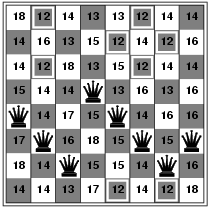

In [ ]:
a = [1,2,3,4]
a[2]=4
a

[1, 2, 4, 4]

In [ ]:
import numpy as np
class n_queens ():
    #attributes of the class are empty
    name = ""
    initial_state = {}
    actions = []
    number_of_queens = 8
    successors = []

    def __init__(self): ## init method is the constructor.
        self.name ="N_queens"

        # to formulate the problem we will state that there will be a set of
        # n queens in n columns. Each queen will be placed in a column, so we
        # only need to state which row they are in, in an 8-sized array
        # self.initial_state = [4,5,6,3,4,5,6,5]
        self.initial_state = [3,7,1,4,5,5,1,5]
        # the actions will be changing the row of a queen, the available rows are_
        # the number of queens
        self.actions= range(self.number_of_queens)



    # we cannot check if it is final state, we don't know which exactly is
    # the final state. In the same way, applicable and effect functions are not
    # needed. THESE FUNCTIONS ARE NOT REQUIRED IN THIS KIND OF PROBLEMS
    '''
    def is_final_state(self, state):
        return state == self.goal_state

    #####
    # def is_applicable (self, state, action):
    #     return action in self.connections[state]["actions"].keys()

    # moving to another city results in being in this city.
    def effect (self, state, action):
        return action
    '''

    # INSTEAD WE NEED A FUNCTION TO OBTAIN THE SUCCESSORS OF A STATE (SIMILAR
    # TO APPLY AN APPLICABLE EFFECT)

    def get_successors(self, state):
      successors = []
      for col in range(self.number_of_queens):
        row = state[col]
        for new_row in self.actions:
          if new_row != row:
            successor = state.copy()
            successor[col]=new_row
            successors.append (successor)
      return successors

    def get_horizontal_fights (self, state, row, column):
      fights = 0
      for col in range (column+1, self.number_of_queens):
        if state[col]==row:
          fights+=1
      return fights

    def get_right_diagonal_fights (self, state, row, column):
      fights = 0
      inc = 1
      for col in range (column+1, self.number_of_queens):
        if col<self.number_of_queens and row+inc < self.number_of_queens:
          if state[col]==row+inc:
            fights+=1
        inc += 1
      return fights


    def get_left_diagonal_fights (self, state, row, column):
      fights = 0
      inc = 0
      for col in range (0, column):
        if row+row-inc < self.number_of_queens:
          if state[col]==row+row-inc:
            fights+=1
        inc += 1
      return fights

    def draw(self, state):
      temp_str = ""
      temp_board = state
      text= ""
      for i in range (self.number_of_queens):
        for j in range (self.number_of_queens):
          if state[j]==i:
            text +="Q\t"
          else:
            text+="-\t"
        text+="\n"
      print (text)


    def get_cost(self, action, state):
        # in this case the cost is constant, every action is the same, but this can change depending on the problem
        return 1

    # h(n) =  number of queens attacked
    def get_evaluation (self, state):
      total_fights = 0
      for column in range(self.number_of_queens):
        row = state[column]
        total_fights += self.get_horizontal_fights (state, row, column)
        total_fights += self.get_right_diagonal_fights (state, row, column)
        total_fights += self.get_left_diagonal_fights (state, row, column)
      return total_fights


In [ ]:
queens = n_queens()
print(queens.initial_state)
queens.draw(queens.initial_state)
print ("TOTAL FIGHTS",queens.get_evaluation(queens.initial_state))
print ("SUCCESSORS", queens.get_successors(queens.initial_state))

def get_horizontal_fights_left (state, row, column):
  fights = 0
  for col in range (0, column):
    if state[col]==row:
      fights+=1
  return fights


[3, 7, 1, 4, 5, 5, 1, 5]
-	-	-	-	-	-	-	-	
-	-	Q	-	-	-	Q	-	
-	-	-	-	-	-	-	-	
Q	-	-	-	-	-	-	-	
-	-	-	Q	-	-	-	-	
-	-	-	-	Q	Q	-	Q	
-	-	-	-	-	-	-	-	
-	Q	-	-	-	-	-	-	

TOTAL FIGHTS 7
SUCCESSORS [[0, 7, 1, 4, 5, 5, 1, 5], [1, 7, 1, 4, 5, 5, 1, 5], [2, 7, 1, 4, 5, 5, 1, 5], [4, 7, 1, 4, 5, 5, 1, 5], [5, 7, 1, 4, 5, 5, 1, 5], [6, 7, 1, 4, 5, 5, 1, 5], [7, 7, 1, 4, 5, 5, 1, 5], [3, 0, 1, 4, 5, 5, 1, 5], [3, 1, 1, 4, 5, 5, 1, 5], [3, 2, 1, 4, 5, 5, 1, 5], [3, 3, 1, 4, 5, 5, 1, 5], [3, 4, 1, 4, 5, 5, 1, 5], [3, 5, 1, 4, 5, 5, 1, 5], [3, 6, 1, 4, 5, 5, 1, 5], [3, 7, 0, 4, 5, 5, 1, 5], [3, 7, 2, 4, 5, 5, 1, 5], [3, 7, 3, 4, 5, 5, 1, 5], [3, 7, 4, 4, 5, 5, 1, 5], [3, 7, 5, 4, 5, 5, 1, 5], [3, 7, 6, 4, 5, 5, 1, 5], [3, 7, 7, 4, 5, 5, 1, 5], [3, 7, 1, 0, 5, 5, 1, 5], [3, 7, 1, 1, 5, 5, 1, 5], [3, 7, 1, 2, 5, 5, 1, 5], [3, 7, 1, 3, 5, 5, 1, 5], [3, 7, 1, 5, 5, 5, 1, 5], [3, 7, 1, 6, 5, 5, 1, 5], [3, 7, 1, 7, 5, 5, 1, 5], [3, 7, 1, 4, 0, 5, 1, 5], [3, 7, 1, 4, 1, 5, 1, 5], [3, 7, 1, 4, 2, 5, 1, 5], [3, 7

# Expansion Function


```
1. bestSuccessor = currentNode’s firstSuccessor

2. FOR EACH of the rest of currentNode’s Successors DO
  2.1 Compute f(successor)
  2.2 IF f(successor) “better than” f(bestSuccessor) THEN
    2.2.1 bestSuccessor = successor

3. RETURN bestSuccessor

```






In [ ]:
# instead of updating the frontier, the expand function only creates a list of child of possible nodes given a current node
# it does not receive states, but NODES, dictionaries that include other information besides state
def expand (node, problem):
    successors = problem.get_successors(node["state"])
    #1.
    best_successor = successors[0]
    2.
    for successor in successors:
      2.1
      if problem.get_evaluation(successor)<problem.get_evaluation(best_successor):
        best_successor=successor

    new_node = {}
    new_node["state"]=best_successor
    new_node["parent_node"]=node
    # we dont store the list of actions, cost or depth
    # new_node["actions"]=node["actions"] + [action]
    # new_node["cost"]=node["cost"] + problem.get_cost(action, node["state"])
    # new_node["depth"]=node["depth"]+1
    new_node["evaluation"]=problem.get_evaluation(best_successor)
    # we only return a node, the next to be explored
    return new_node


# HILL CLIMBING METHOD


## HILL CLIMBING BASIC

```
1. Make the initialNode with initial problem state
2. currentNode = initialNode
3. WHILE local_best_FOUND NOT found DO
  3.1. EXPAND currentNode AND KEEP bestSuccessor
  3.2.IF f(currentNode) “better or equal than” f(bestSuccessor) THEN
    3.2.1. local_best_FOUND
  3.3. ELSE
    3.3.1. currentNode = bestSuccessor

4. RETURN currentNode’s state

```



In [ ]:
def HillClimbing(problem):
  #1.
  initial_node = {}
  initial_node["state"]=problem.initial_state
  initial_node["parent_node"]=None
  initial_node["evaluation"]=problem.get_evaluation(problem.initial_state)

  #2
  current_node =initial_node


  local_best_found = False

  iteration = 1
  #3.
  while not local_best_found:

    ## just prints
    print ("***************************************")
    print ("ITERATION: ", iteration)
    problem.draw(current_node["state"])
    print ("Heuristic of the current node: ", problem.get_evaluation(current_node["state"]))
    ##

    # 3.1.
    best_successor = expand(current_node, problem)

    #3.2
    if problem.get_evaluation(current_node["state"])<=
        problem.get_evaluation(best_successor["state"]):
      local_best_found=True
      print ("Local minimum found, best_successor heuristic is : ", problem.get_evaluation(best_successor["state"]))
      print ("BEst node with evaluation h(n)=", problem.get_evaluation(current_node["state"]))
      problem.draw(current_node["state"])
    #3.3.
    else:
      current_node = best_successor




    iteration+=1
  return current_node





In [ ]:
queens = n_queens()
solution  = HillClimbing(queens)


***************************************
ITERATION:  1
-	-	-	-	-	-	-	-	
-	-	Q	-	-	-	Q	-	
-	-	-	-	-	-	-	-	
Q	-	-	-	-	-	-	-	
-	-	-	Q	-	-	-	-	
-	-	-	-	Q	Q	-	Q	
-	-	-	-	-	-	-	-	
-	Q	-	-	-	-	-	-	

Heuristic of the current node:  7
***************************************
ITERATION:  2
-	-	-	-	Q	-	-	-	
-	-	Q	-	-	-	Q	-	
-	-	-	-	-	-	-	-	
Q	-	-	-	-	-	-	-	
-	-	-	Q	-	-	-	-	
-	-	-	-	-	Q	-	Q	
-	-	-	-	-	-	-	-	
-	Q	-	-	-	-	-	-	

Heuristic of the current node:  4
***************************************
ITERATION:  3
-	-	-	-	Q	-	-	-	
-	-	Q	-	-	-	Q	-	
-	-	-	-	-	-	-	-	
Q	-	-	-	-	-	-	-	
-	-	-	Q	-	-	-	-	
-	-	-	-	-	Q	-	Q	
-	Q	-	-	-	-	-	-	
-	-	-	-	-	-	-	-	

Heuristic of the current node:  3
***************************************
ITERATION:  4
-	-	-	-	Q	-	-	-	
-	-	Q	-	-	-	Q	-	
-	-	-	-	-	-	-	-	
Q	-	-	-	-	-	-	-	
-	-	-	Q	-	-	-	-	
-	-	-	-	-	-	-	Q	
-	Q	-	-	-	-	-	-	
-	-	-	-	-	Q	-	-	

Heuristic of the current node:  1
***************************************
ITERATION:  5
-	-	-	-	Q	-	-	-	
-	-	-	-	-	-	Q	-	
-	-	Q	-	-	-	

# HOW DO WE IMPROVE THIS?
When we get the successors, we avoid the connections that cause problems, the straight lines and diagonals with the already positioned queens:

In [ ]:
import numpy as np
class n_queens ():
    #attributes of the class are empty
    name = ""
    initial_state = {}
    actions = []
    number_of_queens = 8
    successors = []

    def __init__(self): ## init method is the constructor.
        self.name ="N_queens"

        # to formulate the problem we will state that there will be a set of
        # n queens in n columns. Each queen will be placed in a column, so we
        # only need to state which row they are in, in an 8-sized array
        #self.initial_state = [4,5,6,3,4,5,6,5]
        self.initial_state = [3,7,1,4,5,5,1,5]

        # the actions will be changing the row of a queen, the available rows are_
        # the number of queens
        self.actions= range(self.number_of_queens)

    # INSTEAD WE NEED A FUNCTION TO OBTAIN THE SUCCESSORS OF A STATE (SIMILAR
    # TO APPLY AN APPLICABLE EFFECT)

    def get_successors(self, state):
      successors = []

      #first successor creates 7 new ones in 7 available rows
      for new_row in self.actions:
        successor = state.copy()
        successor[0]=new_row
        successors.append (successor)


      # for the rest of successors
      for col in range(1, self.number_of_queens):
        new_successors =[]
        for successor in successors:
          row = successor[col]
          for new_row in self.actions:
              new_successor = successor.copy()
              new_successor[col]=new_row
              if (self.get_horizontal_fights(new_successor, new_row, col)+
                  self.get_diagonal_up_left_fights(new_successor, new_row, col) +
                  self.get_left_diagonal_fights(new_successor, new_row, col)) ==0:
                  new_successors.append (new_successor)
        successors = new_successors.copy()
      return successors

    # WE NEED TO CREATE THIS TO CHECK TO THE LEFT AND THE UPPPER RIGHT
    def get_horizontal_fights_left (self, state, row, column):
      fights = 0
      for col in range (0, column):
        if state[col]==row:
          fights+=1
      return fights

    def get_diagonal_up_left_fights(self, state, row, column):
      fights = 0
      inc = 0
      for col in range (0, column):
        if row-row+inc >=0:
          if state[col]==row-row+inc:
            fights+=1
        inc += 1
      return fights

    def get_horizontal_fights (self, state, row, column):
      fights = 0
      for col in range (column+1, self.number_of_queens):
        if state[col]==row:
          fights+=1
      return fights

    def get_right_diagonal_fights (self, state, row, column):
      fights = 0
      inc = 1
      for col in range (column+1, self.number_of_queens):
        if col<self.number_of_queens and row+inc < self.number_of_queens:
          if state[col]==row+inc:
            fights+=1
        inc += 1
      return fights


    def get_left_diagonal_fights (self, state, row, column):
      fights = 0
      inc = 0
      for col in range (0, column):
        if row+row-inc < self.number_of_queens:
          if state[col]==row+row-inc:
            fights+=1
        inc += 1
      return fights


    def draw(self, state):
      temp_str = ""
      temp_board = state
      text= ""
      for i in range (self.number_of_queens):
        for j in range (self.number_of_queens):
          if state[j]==i:
            text +="Q\t"
          else:
            text+="-\t"
        text+="\n"
      print (text)


    def get_cost(self, action, state):
        # in this case the cost is constant, every action is the same, but this can change depending on the problem
        return 1

    # h(n) =  number of queens attacked
    def get_evaluation (self, state):
      total_fights = 0
      for column in range(self.number_of_queens):
        row = state[column]
        total_fights += self.get_horizontal_fights (state, row, column)
        total_fights += self.get_right_diagonal_fights (state, row, column)
        total_fights += self.get_left_diagonal_fights (state, row, column)
      return total_fights


In [ ]:
queens = n_queens()
solution  = HillClimbing(queens)

***************************************
ITERATION:  1
-	-	-	-	-	-	-	-	
-	-	Q	-	-	-	Q	-	
-	-	-	-	-	-	-	-	
Q	-	-	-	-	-	-	-	
-	-	-	Q	-	-	-	-	
-	-	-	-	Q	Q	-	Q	
-	-	-	-	-	-	-	-	
-	Q	-	-	-	-	-	-	

Heuristic of the current node:  7
***************************************
ITERATION:  2
-	Q	-	-	-	-	-	-	
-	-	-	-	-	-	Q	-	
-	-	-	-	Q	-	-	-	
-	-	Q	-	-	-	-	-	
-	-	-	-	-	-	-	Q	
Q	-	-	-	-	-	-	-	
-	-	-	Q	-	-	-	-	
-	-	-	-	-	Q	-	-	

Heuristic of the current node:  0
Local minimum found, best_successor heuristic is :  0
BEst successor is:
-	Q	-	-	-	-	-	-	
-	-	-	-	-	-	Q	-	
-	-	-	-	Q	-	-	-	
-	-	Q	-	-	-	-	-	
-	-	-	-	-	-	-	Q	
Q	-	-	-	-	-	-	-	
-	-	-	Q	-	-	-	-	
-	-	-	-	-	Q	-	-	

